In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy import signal
from scipy.integrate import trapz
from scipy.interpolate import interp1d
import seaborn as sns
import array as arr
import neurokit2 as nk

In [2]:
data = pd.read_csv(r"C:\Users\fffmm\Desktop\SCTIMST\LAB_Internship\EEG\data\Data100.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16384 entries, 0 to 16383
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16384 non-null  int64  
 1   trial number        16384 non-null  int64  
 2   sensor position     16384 non-null  object 
 3   sample num          16384 non-null  int64  
 4   sensor value        16384 non-null  float64
 5   subject identifier  16384 non-null  object 
 6   matching condition  16384 non-null  object 
 7   channel             16384 non-null  int64  
 8   name                16384 non-null  object 
 9   time                16384 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.3+ MB
None


In [3]:
data

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,13,FP1,0,3.947,a,"S2 nomatch,",0,co2a0000369,0.000000
1,6,13,FP1,1,4.924,a,"S2 nomatch,",0,co2a0000369,0.003906
2,7,13,FP1,2,4.924,a,"S2 nomatch,",0,co2a0000369,0.007812
3,8,13,FP1,3,4.435,a,"S2 nomatch,",0,co2a0000369,0.011719
4,9,13,FP1,4,3.947,a,"S2 nomatch,",0,co2a0000369,0.015625
...,...,...,...,...,...,...,...,...,...,...
16379,16447,13,Y,251,-6.429,a,"S2 nomatch,",63,co2a0000369,0.980469
16380,16448,13,Y,252,-4.476,a,"S2 nomatch,",63,co2a0000369,0.984375
16381,16449,13,Y,253,-2.035,a,"S2 nomatch,",63,co2a0000369,0.988281
16382,16450,13,Y,254,0.895,a,"S2 nomatch,",63,co2a0000369,0.992188


In [4]:
data1=data[['time','sensor value']]

In [5]:
data1

,time,sensor value
0,0.000000,3.947
1,0.003906,4.924
2,0.007812,4.924
3,0.011719,4.435
4,0.015625,3.947
...,...,...
16379,0.980469,-6.429
16380,0.984375,-4.476
16381,0.988281,-2.035
16382,0.992188,0.895


In [6]:
data2=data1.head(2000)

In [7]:
f_sample=len(data['sensor value'])/100
# sampling frq or sampling rate

<AxesSubplot:>

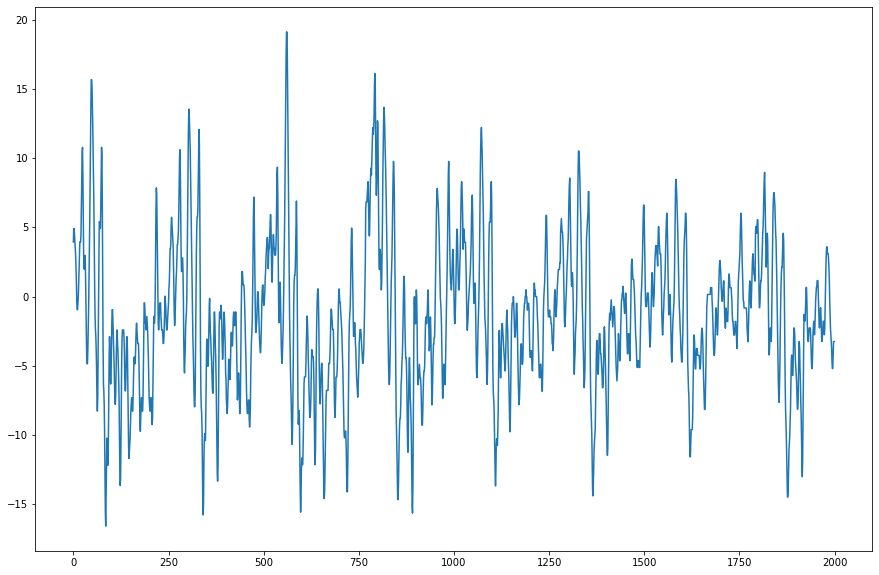

In [8]:
data2['sensor value'].plot(figsize=(15,10))

In [9]:
# pass band frequency 
f_pass =[10,37] 

# stop band frequency 
f_stop =[8,39] 

In [10]:
# pass band ripple 
fs = 0.5
    
# Sampling Time 
Td = 1  
    
 # pass band ripple 
g_pass = 0.4 

# stop band attenuation 
g_stop = 50 

In [11]:
# User-defined function to convert the 
# values of edge frequencies
def convertX(f_sample,f):
    w=[]
    for i in range(len(f)):
        b=2*((f[i]/2)/(f_sample/2))
        w.append(b)
    omega_mine=[]
    for i in range(len(w)):
        c=(2/Td)*np.tan(w[i]/2)
        omega_mine.append(c)
    return omega_mine
  

In [12]:
# Conversion to prewrapped analog
# frequency 
omega_p=convertX(f_sample,f_pass)
omega_s=convertX(f_sample,f_stop)

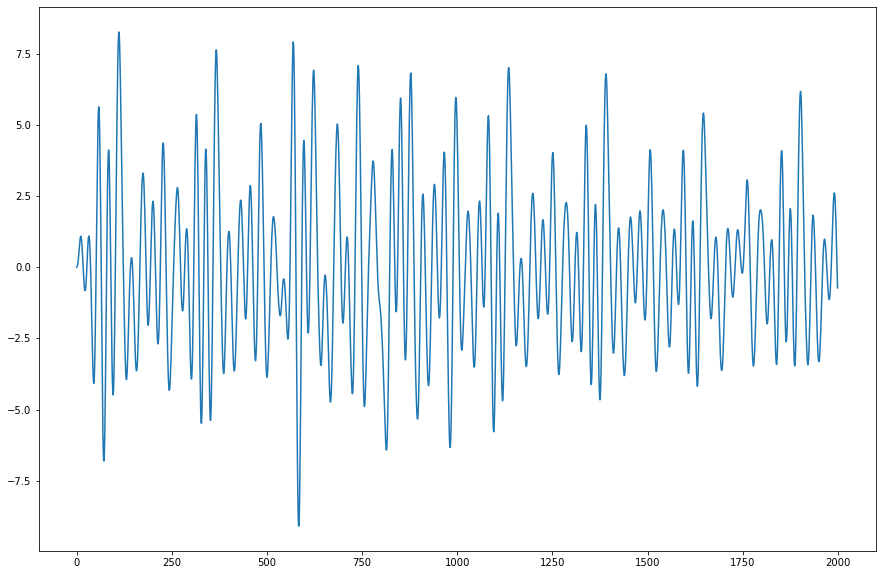

In [42]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 1000
    lowcut = 10.0
    highcut = 37.0

    t= data2['time']
    x= data2['sensor value']

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=3)
    plt.plot(y, label='Filtered signal (%g Hz)' )

    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = (15,10)
    plt.show()


run()


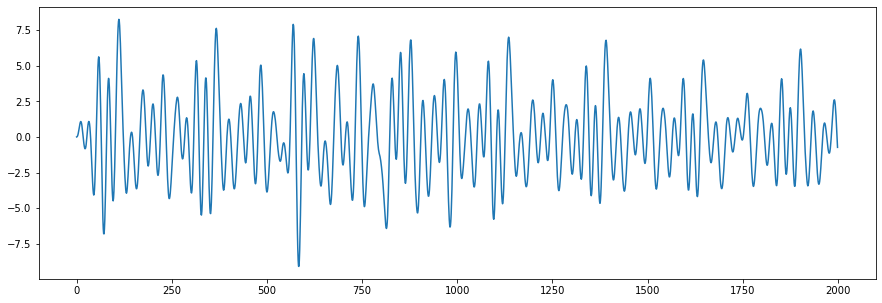

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 1000
lowcut = 10.0
highcut = 37.0

t= data2['time']
x= data2['sensor value']

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=3)
plt.plot(y, label='Filtered signal (%g Hz)' )

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
plt.show()


<AxesSubplot:>

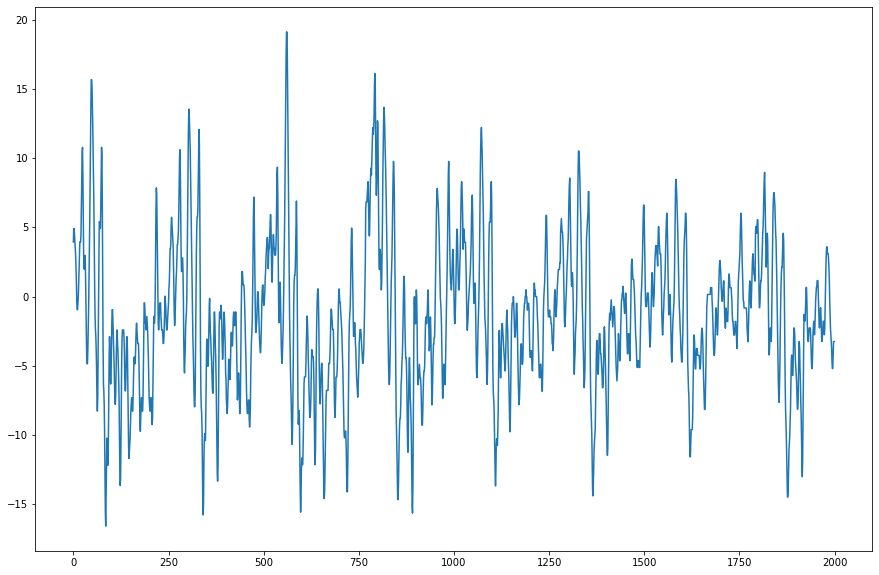

In [15]:
data2['sensor value'].plot(figsize=(15,10))

In [16]:
data4 = pd.read_csv(r"C:\Users\fffmm\Desktop\SCTIMST\LAB_Internship\EEG\data_micro.csv")

In [17]:
data4.head(10)

,Unnamed: 0,sensor value
0,0,3.947
1,1,4.924
2,2,4.924
3,3,4.435
4,4,3.947
5,5,3.459
6,6,2.970
7,7,1.994
8,8,1.017
9,9,-0.448


In [18]:
data2.head(10)

,time,sensor value
0,0.000000,3.947
1,0.003906,4.924
2,0.007812,4.924
3,0.011719,4.435
4,0.015625,3.947
5,0.019531,3.459
6,0.023438,2.970
7,0.027344,1.994
8,0.031250,1.017
9,0.035156,-0.448


In [23]:
ser1 = pd.Series(k)

In [24]:
ser2 = pd.Series(data2['time'])

In [25]:
data2.index

RangeIndex(start=0, stop=2000, step=1)

In [26]:
arr1=ser1.to_numpy(dtype ='float32')

In [27]:
arr2=ser2.to_numpy(dtype='float32')

In [28]:
arr1

array([9.2398932e-06, 9.8461438e-05, 5.2282220e-04, ..., 1.0711277e+00,
       1.0222642e+00, 8.7757939e-01], dtype=float32)

In [29]:
ser1

0       0.000009
1       0.000098
2       0.000523
3       0.001871
4       0.005135
          ...   
1995    0.882532
1996    1.023074
1997    1.071128
1998    1.022264
1999    0.877579
Length: 2000, dtype: float64

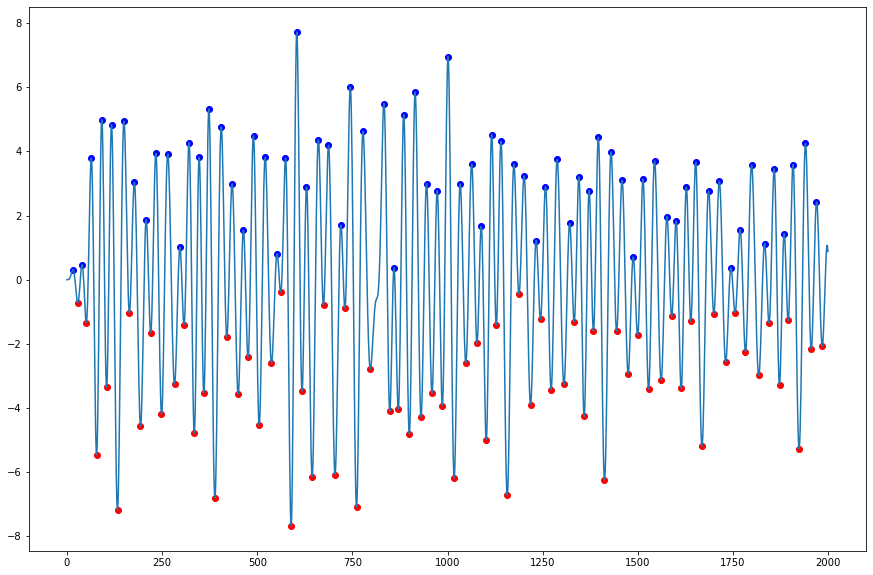

In [30]:

import sys
from numpy import NaN, Inf, arange, isscalar, asarray, array

def peakdet(v, delta, x = None):
    """
    Converted from MATLAB script at http://billauer.co.il/peakdet.html
    
    Returns two arrays
    
    function [maxtab, mintab]=peakdet(v, delta, x)
    %PEAKDET Detect peaks in a vector
    %        [MAXTAB, MINTAB] = PEAKDET(V, DELTA) finds the local
    %        maxima and minima ("peaks") in the vector V.
    %        MAXTAB and MINTAB consists of two columns. Column 1
    %        contains indices in V, and column 2 the found values.
    %      
    %        With [MAXTAB, MINTAB] = PEAKDET(V, DELTA, X) the indices
    %        in MAXTAB and MINTAB are replaced with the corresponding
    %        X-values.
    %
    %        A point is considered a maximum peak if it has the maximal
    %        value, and was preceded (to the left) by a value lower by
    %        DELTA.
    
    % Eli Billauer, 3.4.05 (Explicitly not copyrighted).
    % This function is released to the public domain; Any use is allowed.
    
    """
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return array(maxtab), array(mintab)
    return array(x)

if __name__=="__main__":
    from matplotlib.pyplot import plot, scatter, show
    series = arr1
    maxtab, mintab = peakdet(series,.3)
    plot(series)
    scatter(array(maxtab)[:,0], array(maxtab)[:,1], color='blue')
    scatter(array(mintab)[:,0], array(mintab)[:,1], color='red')
    show()

In [31]:
maxtab

array([[1.60000000e+01, 3.13014328e-01],
       [4.00000000e+01, 4.67083186e-01],
       [6.40000000e+01, 3.79035330e+00],
       [9.10000000e+01, 4.99259949e+00],
       [1.17000000e+02, 4.83068705e+00],
       [1.50000000e+02, 4.94558430e+00],
       [1.77000000e+02, 3.03965592e+00],
       [2.08000000e+02, 1.86658144e+00],
       [2.33000000e+02, 3.93907666e+00],
       [2.65000000e+02, 3.91870785e+00],
       [2.97000000e+02, 1.01352692e+00],
       [3.21000000e+02, 4.27303028e+00],
       [3.47000000e+02, 3.81719494e+00],
       [3.73000000e+02, 5.32379389e+00],
       [4.05000000e+02, 4.76575375e+00],
       [4.34000000e+02, 2.98710895e+00],
       [4.63000000e+02, 1.54929507e+00],
       [4.90000000e+02, 4.48786306e+00],
       [5.21000000e+02, 3.81347895e+00],
       [5.52000000e+02, 8.05198491e-01],
       [5.74000000e+02, 3.79729342e+00],
       [6.04000000e+02, 7.72927475e+00],
       [6.29000000e+02, 2.89424801e+00],
       [6.60000000e+02, 4.36583853e+00],
       [6.870000

In [32]:
maxtab[5,0]

150.0

In [33]:
# we need only the max valued peak points
# if the value of the peak is more than 5, then start a square wave at that moment for next 5 mili secs


In [34]:
p=np.zeros(2000)
for i in range(len(maxtab)):
    if (maxtab[i,1])>0:
        p[int(maxtab[i,0])]=1
        p[int(maxtab[i,0])+1]=1
        p[int(maxtab[i,0])+2]=1
        p[int(maxtab[i,0])+3]=1
        p[int(maxtab[i,0])+4]=1    # just to make square waves n data point thick

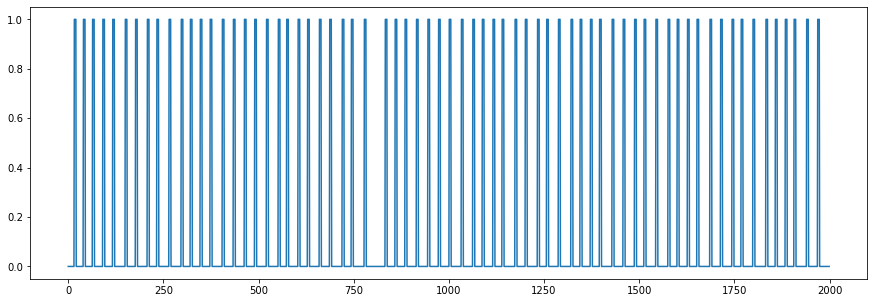

In [35]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(p)

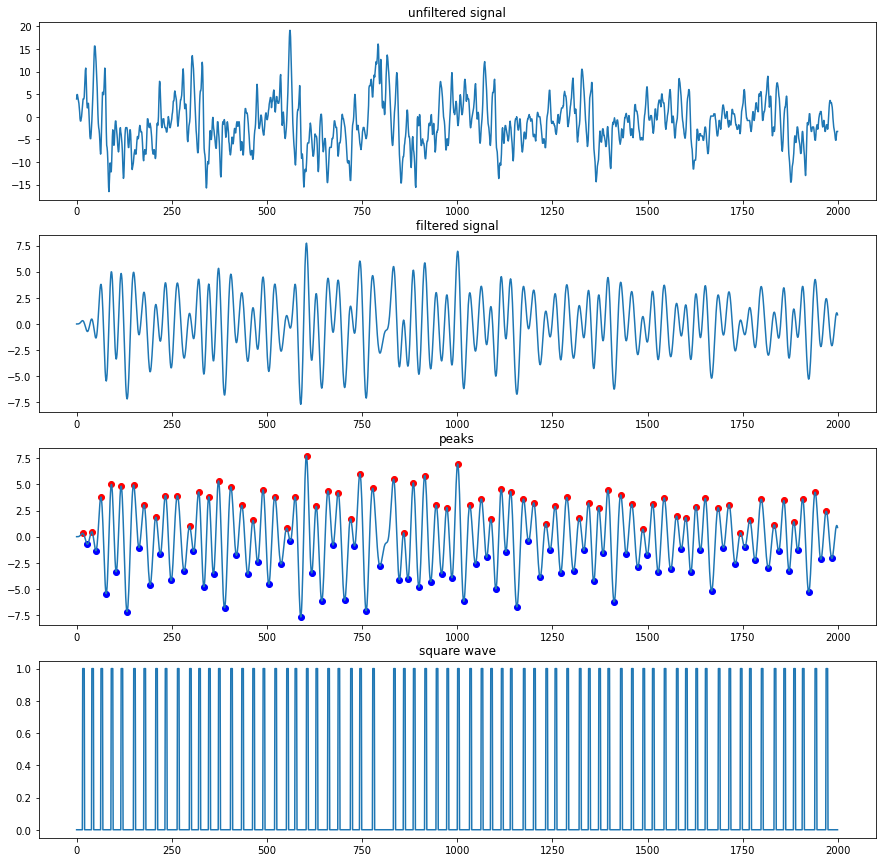

In [36]:
plt_1 = plt.figure(figsize=(15, 15))
plt.figure(1)
plt.subplot(411)
plt.title('unfiltered signal')
plt.plot(data2['sensor value'])
plt.subplot(412)
plt.title('filtered signal')
plt.plot(k)
plt.subplot(413)
plt.title('peaks')
plot(series)
scatter(array(maxtab)[:,0], array(maxtab)[:,1], color='red')
scatter(array(mintab)[:,0], array(mintab)[:,1], color='blue')
plt.subplot(414)
plt.title('square wave')
plt.plot(p)

In [20]:
from scipy.signal import butter, sosfilt, sosfreqz

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

In [21]:
k=butter_bandpass_filter(data2['sensor value'],12,37,1000)

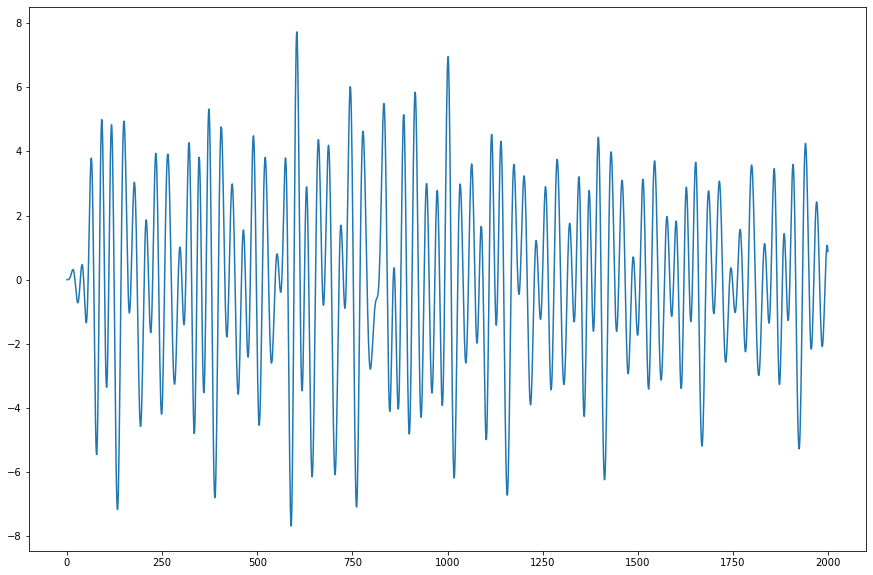

In [22]:
plt.plot(k)

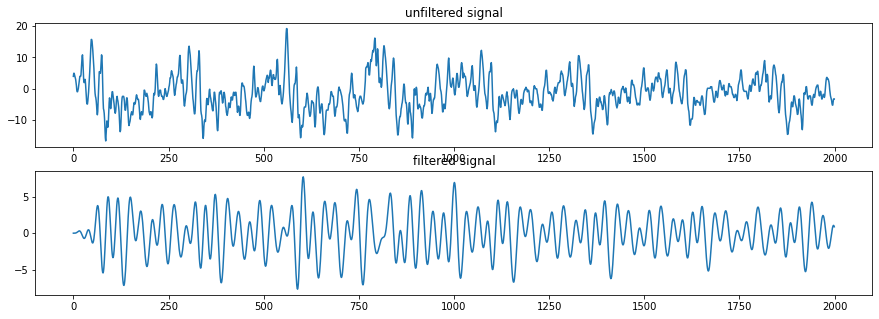

In [37]:
plt.figure(1)
plt.subplot(211)
plt.title('unfiltered signal')
plt.plot(data2['sensor value'])
plt.subplot(212)
plt.title('filtered signal')
plt.plot(k)

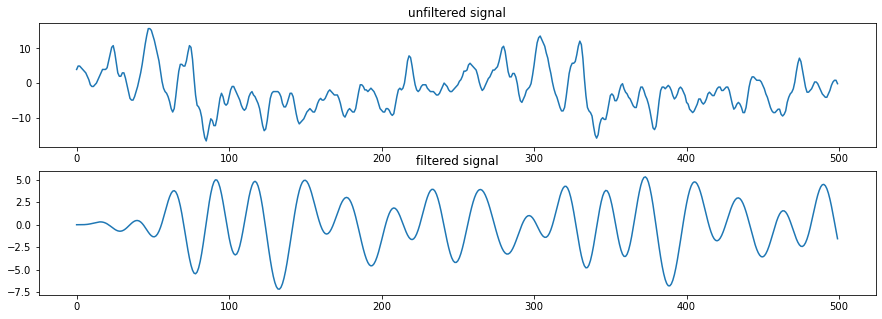

In [38]:
plt.figure(1)
plt.subplot(211)
plt.title('unfiltered signal')
plt.plot(data2['sensor value'][0:500])
plt.subplot(212)
plt.title('filtered signal')
plt.plot(k[0:500])

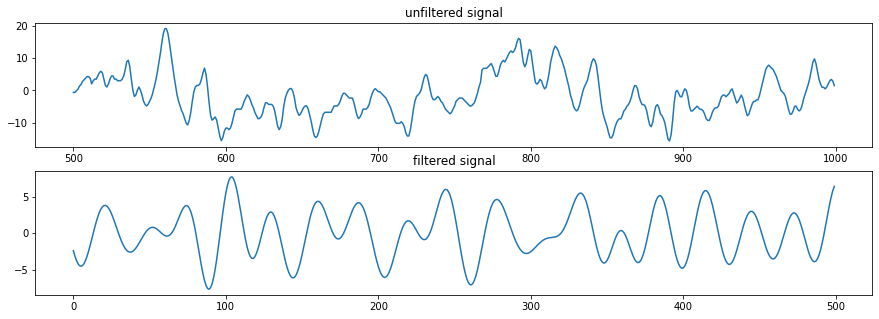

In [39]:
plt.figure(1)
plt.subplot(211)
plt.title('unfiltered signal')
plt.plot(data2['sensor value'][500:1000])
plt.subplot(212)
plt.title('filtered signal')
plt.plot(k[500:1000])

In [40]:
k

array([9.23989342e-06, 9.84614373e-05, 5.22822203e-04, ...,
       1.07112769e+00, 1.02226429e+00, 8.77579419e-01])

In [ ]:
x

In [ ]:
len(x)

In [ ]:
DURATION=1
SAMPLE_RATE = f_sample

In [ ]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft((data2['sensor value']).values)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [ ]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft((data2['sensor value']).values)
#xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(np.abs(yf))
plt.show()